## Objective
The goal of this lab is to guide you through the modeling workflow to produce the best model you can. In this lesson, you will follow all best practices when slicing your data and validating your model. 

### Imports

In [2]:
# Import everything you need here.
# You may want to return to this cell to import more things later in the lab.
# DO NOT COPY AND PASTE FROM OUR CLASS SLIDES!
# Muscle memory is important!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
import scipy.stats
from sklearn import metrics


### Read Data
The `citibike` dataset consists of Citi Bike ridership data for over 224,000 rides in February 2014.

In [3]:
# the dataset is contained in the `data` folder
df=pd.read_csv('../lab-3.02-validation/data/citibike_feb2014.csv')

In [4]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,294,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,21101,Subscriber,1991,1
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,285,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,15456,Subscriber,1979,2
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,247,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,16281,Subscriber,1948,2
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,357,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,17400,Subscriber,1981,1
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,401,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,19341,Subscriber,1990,1


### Explore the data
Use this space to familiarize yourself with the data.

Convince yourself there are no issues with the data. If you find any issues, clean them here.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224736 entries, 0 to 224735
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             224736 non-null  int64  
 1   starttime                224736 non-null  object 
 2   stoptime                 224736 non-null  object 
 3   start station id         224736 non-null  int64  
 4   start station name       224736 non-null  object 
 5   start station latitude   224736 non-null  float64
 6   start station longitude  224736 non-null  float64
 7   end station id           224736 non-null  int64  
 8   end station name         224736 non-null  object 
 9   end station latitude     224736 non-null  float64
 10  end station longitude    224736 non-null  float64
 11  bikeid                   224736 non-null  int64  
 12  usertype                 224736 non-null  object 
 13  birth year               224736 non-null  object 
 14  gend

In [6]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,gender
count,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000
mean,874.519810,439.203479,40.734366,-73.990386,440.741995,40.734221,-73.990521,18010.598222,1.154617
std,5486.092219,335.723861,0.019031,0.011853,341.497433,0.019048,0.011920,1987.769335,0.436592
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,0.000000
25%,360.000000,305.000000,40.721854,-73.998522,305.000000,40.721816,-73.999061,16302.000000,1.000000
50%,544.000000,403.000000,40.736197,-73.990617,403.000000,40.735877,-73.990741,17975.000000,1.000000
75%,845.000000,490.000000,40.749156,-73.981918,488.000000,40.749013,-73.981948,19689.000000,1.000000
max,766108.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,21542.000000,2.000000


-----

### What numeric columns shouldn't be treated as numeric?

birth year,gender,trip duration

### Dummify the `start station id` variable

In [7]:
df['start station id'].unique()

array([ 294,  285,  247,  357,  401,  152,  325,  354,  375,  518,  501,
        388,  257,  477,  317,  527,  504,  316,  490,  450,  300,  474,
        540,  347,  499,  403,  237,  146,  497,  470,  355,  494,  496,
        143,  345,  368,  444,  493,  435,  229,  526,  372,  349,  488,
       2012,  476, 3002, 2021,  443,  351,  405,  280,  473,  319,  312,
        404,  384,  483,  446,  453,  116,  480,  157,  432,  410,  503,
        161,  326,  284,  336,  482,  441,  293,  394,  279,  417,  380,
        438,  254,  342,  505,  523,  252,  522,  463,  521,  528,  366,
        466,  485,  500,  334,  389,  434,  251,  519, 2002,  147,  449,
        402,  461,  308,  168,  418,  412,  242,  460,  364,  127,  236,
        508,  433,  263,  537,  352,  462,  531,  428,  291,  350,  495,
        492,  327,  545,  486,  307,  212,  223,  546,  469,  411,  515,
        423,  387,  297,  383,  478,  415,  396,  268,   83,  390,  324,
        310,  489,  358, 2008,  238,  262,  395,  3

In [8]:
df=pd.get_dummies(data=df,columns=['start station id'],drop_first=True)

In [9]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station name',
       'start station latitude', 'start station longitude', 'end station id',
       'end station name', 'end station latitude', 'end station longitude',
       ...
       'start station id_2006', 'start station id_2008',
       'start station id_2009', 'start station id_2010',
       'start station id_2012', 'start station id_2017',
       'start station id_2021', 'start station id_2022',
       'start station id_2023', 'start station id_3002'],
      dtype='object', length=342)

In [10]:
df=pd.get_dummies(data=df,columns=['usertype'],drop_first=True)

In [11]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station name',
       'start station latitude', 'start station longitude', 'end station id',
       'end station name', 'end station latitude', 'end station longitude',
       ...
       'start station id_2008', 'start station id_2009',
       'start station id_2010', 'start station id_2012',
       'start station id_2017', 'start station id_2021',
       'start station id_2022', 'start station id_2023',
       'start station id_3002', 'usertype_Subscriber'],
      dtype='object', length=342)

In [12]:
df['usertype_Subscriber'].value_counts()

1    218019
0      6717
Name: usertype_Subscriber, dtype: int64

### Engineer a feature called `age` that shares how old the person would have been in 2014 (at the time the data was collected).

- Note: you will need to clean the data to do this.

In [13]:
df.head(3)

,tripduration,starttime,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,...,start station id_2008,start station id_2009,start station id_2010,start station id_2012,start station id_2017,start station id_2021,start station id_2022,start station id_2023,start station id_3002,usertype_Subscriber
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,...,0,0,0,0,0,0,0,0,0,1
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,...,0,0,0,0,0,0,0,0,0,1
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,...,0,0,0,0,0,0,0,0,0,1


In [14]:
df['birth year'].unique()

array(['1991', '1979', '1948', '1981', '1990', '1978', '1944', '1983',
       '1969', '1986', '1962', '1965', '1942', '1989', '1980', '1957',
       '1951', '1992', '1971', '1982', '1968', '1984', '\\N', '1956',
       '1987', '1985', '1996', '1975', '1988', '1974', '1972', '1959',
       '1973', '1977', '1976', '1953', '1993', '1970', '1963', '1967',
       '1966', '1960', '1961', '1994', '1958', '1955', '1946', '1964',
       '1900', '1995', '1954', '1952', '1949', '1947', '1941', '1938',
       '1950', '1945', '1997', '1934', '1940', '1939', '1936', '1943',
       '1935', '1937', '1922', '1932', '1907', '1926', '1899', '1901',
       '1917', '1910', '1933', '1921', '1927', '1913'], dtype=object)

In [15]:
df_wrong_bd=df[df['birth year']=='\\N']


In [16]:
df_wrong_bd['birth year'].value_counts()

\N    6717
Name: birth year, dtype: int64

In [17]:
 mylist=df_wrong_bd.index
mylist

Int64Index([    31,     55,    222,    266,    293,    302,    306,    329,
               393,    413,
            ...
            224129, 224131, 224306, 224317, 224318, 224385, 224438, 224525,
            224536, 224569],
           dtype='int64', length=6717)

In [18]:
df.drop(index=mylist,inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218019 entries, 0 to 224735
Columns: 342 entries, tripduration to usertype_Subscriber
dtypes: float64(4), int64(4), object(5), uint8(329)
memory usage: 91.7+ MB


In [20]:
df['birth year']=df['birth year'].astype('int')

In [21]:
df['Age'] = 2014 - df['birth year']

In [22]:
df['Age'] .head()

0    23
1    35
2    66
3    33
4    24
Name: Age, dtype: int64

### Split your data into train and test sets

Look at the size of your data. What is a good proportion for your split? Justify your answer.

Use the `tripduration` column as your `y` variable.

For your `X` variables, use `age`, `usertype`, `gender`, and the dummy variables you created from `start station id`.

**NOTE:** When doing your train/test split, please use random seed 123.

In [23]:
X=df[['Age','usertype_Subscriber','gender','start station id_2023', 'start station id_3002']]

In [24]:
X.shape

(218019, 5)

In [26]:
y=df['tripduration']

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=123,test_size=.33)

### Fit a linear regression model in `sklearn` predicting `tripduration`

In [41]:
lr=LinearRegression()
lr

LinearRegression()

In [42]:
lr.fit(X_train,y_train)

LinearRegression()

### Evaluate your model

Look at some evaluation metrics for **both** the training and test data. 
- How did your model do? Is it overfit, underfit, or neither?
- Does this model outperform the baseline? (e.g. setting $\hat{y}$ to be the mean of our training `y` values.)

In [43]:
lr.score(X_train,y_train)

0.00031239798675952724

In [44]:
lr.score(X_test,y_test)

0.00013489008643674527

In [45]:
y_train.mean()

851.2357809847199

low values for r2.high Bias..not describing our data well.

In [46]:
y_pre=lr.predict(X)

In [47]:
y_pre.mean()

851.187959206531

### (BONUS) Analyze your model's residuals

Analyze and interpret your model's errors. Consider a histogram of residuals, a scatterplot of residuals vs. predicted, a scatterplot of actuals vs. predicted, etc. What sorts of mistakes is the model making? Do you notice any patterns?

In [35]:
resid=y-y_pre

In [36]:
resid

0        -345.418369
1        -608.373487
2        -566.687076
3        -201.616300
4        -510.138162
             ...    
224731     34.784734
224732    408.945272
224733   -554.973612
224734   -470.896507
224735   -301.731957
Name: tripduration, Length: 218019, dtype: float64

(array([2.17888e+05, 8.20000e+01, 2.10000e+01, 1.50000e+01, 3.00000e+00,
        2.00000e+00, 4.00000e+00, 3.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ -1137.91954682,  75490.35099707, 152118.62154097, 228746.89208486,
        305375.16262875, 382003.43317264, 458631.70371654, 535259.97426043,
        611888.24480432, 688516.51534821, 765144.7858921 ]),
 <BarContainer object of 10 artists>)

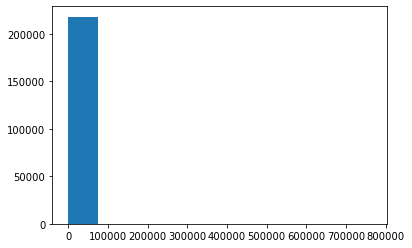

In [37]:
plt.hist(resid,bins=10)

/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tripduration'>

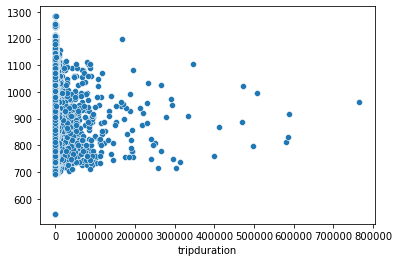

In [38]:
sns.scatterplot(resid,y_pre)

/Users/lubna/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tripduration'>

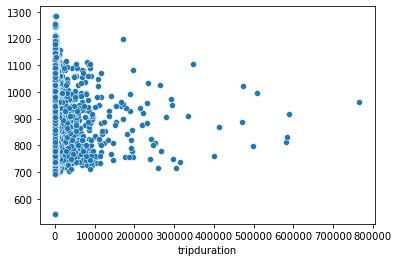

In [39]:
sns.scatterplot(y,y_pre)